# Customizing Ticks

Matplotlib's default trick locators and formatters are designed to be generally sufficient in many common situations, but are in no way optimal for every plot. This section will give several examples of adjusting the tick locations and formatting for the particular plot type you're interested in.

Matplotlib aims to have a Python object representing everythin that appears on the plot: for example, recall that the `figure` is the bounding box within which plot elements appears. Each `figure` can contain one or more `axes` objects, each of which in turn contain other objects representing plot contents.

The tick marks are no exception. Each `axes` has attribures `xaxis` and `yaxis`, which in turn have attributes that contain all the properties of the lines, ticks, and labels that make upt the axes.

## Major and Minor Ticks

Within each axis, there is the concept of a *major* tick mark, and a *minor* tick mark. As the names would imply, mahor ticks are usually bigger or more pronunced, while minor ticks are usually smaller. By default, Matplotlib rarely makes use of minor ticks, but one place you can see them is within logarithmic plots:

In [4]:
import matplotlib.pyplot as plt 
plt.style.use('classic')
%matplotlib inline 
import numpy as np

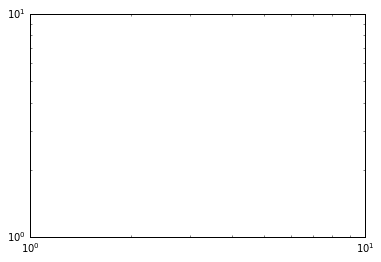

In [5]:
ax = plt.axes(xscale='log', yscale='log')
ax.grid();

We see here that each major tick shows a large tickmark and a label, while each minor tick shows a smaller tickmark with no label.

This can be customized by setting the `formatter` and `locator` objects of each axis.

In [7]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [8]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

## Hiding Ticks or Labels
Perhaps the most common tick/label formatting opeartion is the act of hiding ticks or labels. This can be done using `plt.NullLocator()` and `plt.Nullformatter()`, as shown here:

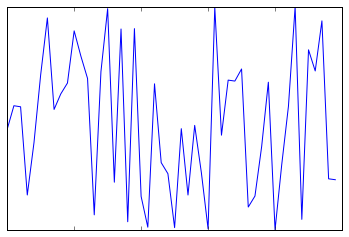

In [10]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

Notice that we've removed the labels from the x axis, and removed the ticks from the y axis. Having no ticks at all can be useful in many situations for example, when you want to show a grid of images.

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\los_g\scikit_learn_data


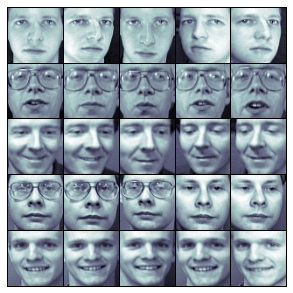

In [11]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data form scikit-learn

from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

All image has its own axes, and we've set the locators to nul because the tick values (pixel number in this case) do not convey relevant information for this particular visualization.

## Reducing or Increasing the Number of Ticks

One common problem with the default settings is that smaller subplots can end up with crowded labels. We can see this in the plot grid shown here:

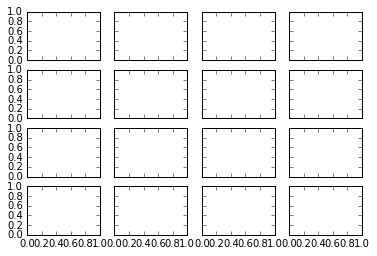

In [12]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

Particularly for the x ticks, the numbers nearly overlap and make them quite difficult to decipher. We can fix this with the `plt.MaxNLocator()`, which allows us to specify the maximum number of ticks that will be displayed. Given this maximum number, Matplotlib will use internal logic to choose the particular tick locations:

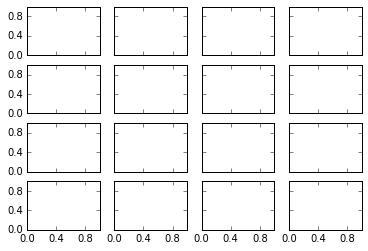

In [13]:
# for every axis, set he x and y major locator

for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

This makes things much cleaner. If you want even more control over the locations of regularly-spaced ticks, you might also use `plt.MultipleLocator`, which we'll discuss in the following section.

## Fancy Tick Formats

Matplotlib's default tick formatting can leave a lot be desired: it works well as a broad default, but sometimes you'd like do something more. Consider this plot of a sine and a cosine:

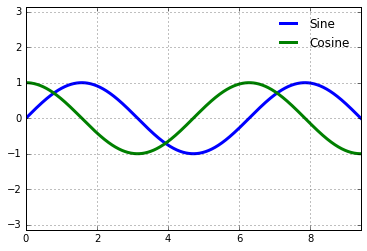

In [14]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

There are a couple changes we might like to make. First, it's more natural for this data to space the ticks and grid line in multiples of $\pi$. We can do this by setting a `MultipleLocator`, which locates ticks at a multiple of the number you provide. For good measure, we'll add both major and minor ticks in multiples of $\frac{\pi}{4}$:

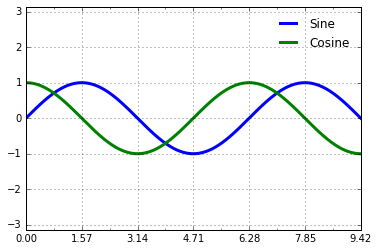

In [15]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

But now these tick labels look a little bit silly: we can see that hey are multipels of $\pi$, but the decimal reprsentation does not immediately convey this. To fix this, we chan change the tick formatter. There's no built-in formatter for waht we want to do, se we'll instead use `plt.FuncFormatter`, which accepts a user-defined function givin fine-grained control over the tick outputs:

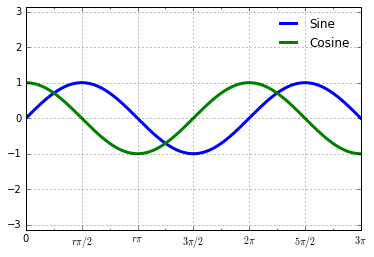

In [22]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$r\pi/2$"
    elif N == 2:
        return r"$r\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

We've made use of Matplotlib's LaTeX support, specified by encolosing the string within dollar signs. This is very convenient for display of mathematical symbolsa nd formulae.

The `plt.FuncFormatter()` offrs extremely fine-grainedcontrol over the appearance of your plot ticks, and comes in very hand ywhen preparing plots for presentation or publication.

## Summary of Formatters and Locators

We've mentioned a couple of the available formatters and locators. We'll conclude this section by briefly listing all the built-in locator and formatter options. For more information on any of these, refer to the docstring or to the Matplolib online documentaiton. Each of the following is available in the `ptl` namespace:

```
Locator class 	Description
NullLocator 	No ticks
FixedLocator 	Tick locations are fixed
IndexLocator 	Locator for index plots (e.g., where x = range(len(y)))
LinearLocator 	Evenly spaced ticks from min to max
LogLocator 	Logarithmically ticks from min to max
MultipleLocator 	Ticks and range are a multiple of base
MaxNLocator 	Finds up to a max number of ticks at nice locations
AutoLocator 	(Default.) MaxNLocator with simple defaults.
AutoMinorLocator 	Locator for minor ticks

Formatter Class 	Description
NullFormatter 	No labels on the ticks
IndexFormatter 	Set the strings from a list of labels
FixedFormatter 	Set the strings manually for the labels
FuncFormatter 	User-defined function sets the labels
FormatStrFormatter 	Use a format string for each value
ScalarFormatter 	(Default.) Formatter for scalar values
LogFormatter 	Default formatter for log axes
```